<a href="https://colab.research.google.com/github/harshita23sharma/loan_default_analysis/blob/main/loan_defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import time
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_default_prediction/data/train.csv")

In [4]:
df.head()

,ID,disbursed_value,asset_cost,Loan to Value,branch_id,supplier_id,manufacturer_id,pincode,DOB,Emp_Type,...,secondary_total_sanctioned_amount,secondary_total_disbursed_amount,primary_emi,seconday_emi,loans_6months,loabs_default_6months,acvg_loan_tenure,credit_hist_length,inquiries,default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,539055,52378,60300,88.39,67,22807,45,1495,9/12/77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
2,510980,52603,61300,86.95,67,22807,45,1492,1/6/68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0
3,486821,64769,74190,89.23,67,22807,45,1446,7/9/84,Salaried,...,0,0,0,0,0,0,2yrs 1mon,2yrs 3mon,1,0
4,478647,53278,61330,89.68,67,22807,45,1497,1/6/74,Salaried,...,0,0,3300,0,0,0,1yrs 3mon,2yrs 9mon,0,1


In [5]:
df.corr().abs()

<ipython-input-5-b043812261d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs()


,ID,disbursed_value,asset_cost,Loan to Value,branch_id,supplier_id,manufacturer_id,pincode,Region_ID,Employee_code_ID,...,secondary_overdue_accs,secondary_total_balance_outstanding,secondary_total_sanctioned_amount,secondary_total_disbursed_amount,primary_emi,seconday_emi,loans_6months,loabs_default_6months,inquiries,default
ID,1.000000,0.154914,0.160008,0.036751,0.008212,0.014006,0.014474,0.043044,0.074598,0.011978,...,0.029489,0.017590,0.021929,0.021665,0.004630,0.014285,0.005709,0.011164,0.015341,0.032779
disbursed_value,0.154914,1.000000,0.750278,0.389003,0.002164,0.074720,0.085523,0.052615,0.028869,0.003945,...,0.012968,0.003300,0.006443,0.006408,0.006680,0.006685,0.032976,0.016946,0.038183,0.081572
asset_cost,0.160008,0.750278,1.000000,0.293028,0.014149,0.149897,0.015563,0.268641,0.030507,0.010798,...,0.013672,0.007047,0.010084,0.010017,0.007771,0.005571,0.023603,0.013731,0.019748,0.013996
Loan to Value,0.036751,0.389003,0.293028,1.000000,0.015365,0.109313,0.120641,0.305866,0.000927,0.017783,...,0.000797,0.005950,0.005968,0.005919,0.001485,0.001854,0.081695,0.045622,0.087688,0.103543
branch_id,0.008212,0.002164,0.014149,0.015365,1.000000,0.197181,0.035216,0.058939,0.158458,0.096697,...,0.008569,0.004334,0.003992,0.003894,0.006573,0.000556,0.005449,0.001519,0.002995,0.022575
supplier_id,0.014006,0.074720,0.149897,0.109313,0.197181,1.000000,0.050926,0.200671,0.077395,0.014392,...,0.016531,0.009306,0.010423,0.010188,0.017526,0.007740,0.052886,0.035204,0.038129,0.028331
manufacturer_id,0.014474,0.085523,0.015563,0.120641,0.035216,0.050926,1.000000,0.125579,0.017266,0.027902,...,0.003815,0.010920,0.011789,0.011862,0.009676,0.005939,0.047248,0.024564,0.010219,0.020027
pincode,0.043044,0.052615,0.268641,0.305866,0.058939,0.200671,0.125579,1.000000,0.106964,0.029687,...,0.038610,0.021385,0.025920,0.025660,0.003799,0.003863,0.112426,0.060572,0.061549,0.027832
Region_ID,0.074598,0.028869,0.030507,0.000927,0.158458,0.077395,0.017266,0.106964,1.000000,0.021579,...,0.014243,0.013174,0.016325,0.016167,0.008195,0.007386,0.024065,0.000838,0.014163,0.054139
Employee_code_ID,0.011978,0.003945,0.010798,0.017783,0.096697,0.014392,0.027902,0.029687,0.021579,1.000000,...,0.007767,0.001185,0.002157,0.002197,0.004727,0.001065,0.013377,0.004156,0.014064,0.006753


<ipython-input-6-535db23168f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

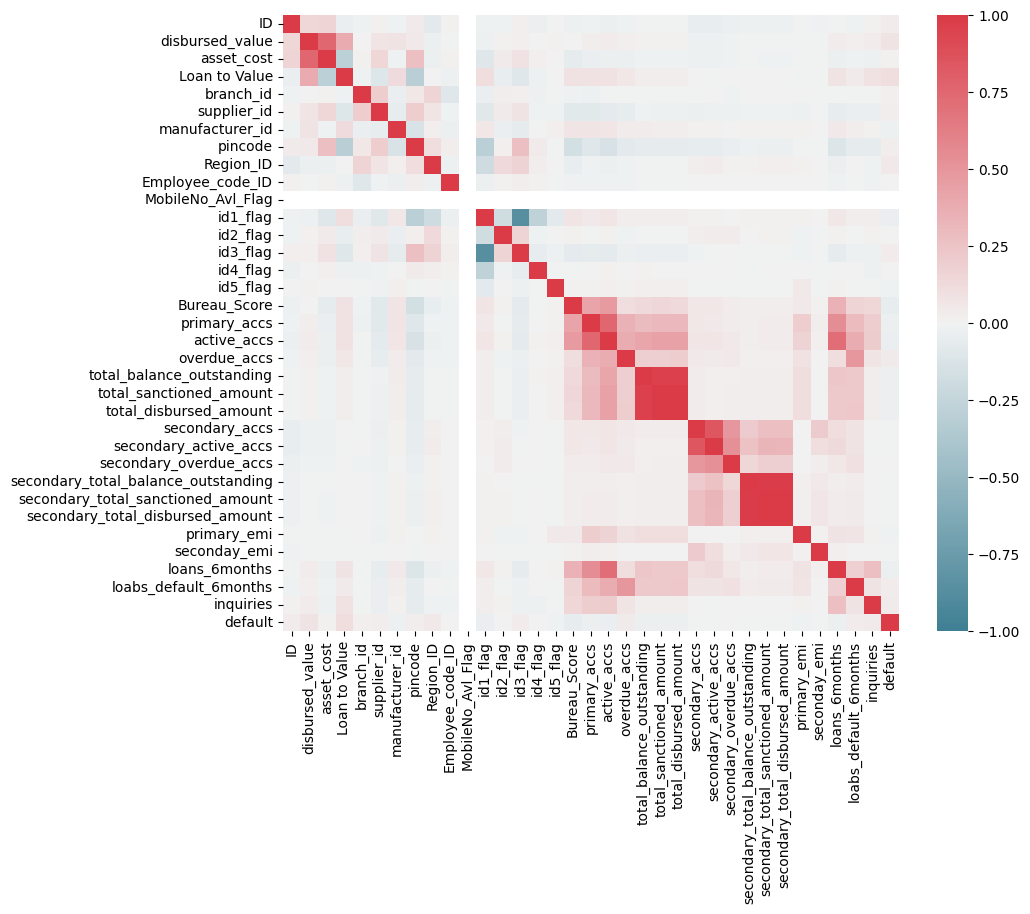

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   50000 non-null  int64  
 1   disbursed_value                      50000 non-null  int64  
 2   asset_cost                           50000 non-null  int64  
 3   Loan to Value                        50000 non-null  float64
 4   branch_id                            50000 non-null  int64  
 5   supplier_id                          50000 non-null  int64  
 6   manufacturer_id                      50000 non-null  int64  
 7   pincode                              50000 non-null  int64  
 8   DOB                                  50000 non-null  object 
 9   Emp_Type                             48246 non-null  object 
 10  DisbursalDate                        50000 non-null  object 
 11  Region_ID                   

#Check for outliers

In [8]:
#Using IQR or Boxplot Method to Find Outliers

In [9]:
df.head(2)

,ID,disbursed_value,asset_cost,Loan to Value,branch_id,supplier_id,manufacturer_id,pincode,DOB,Emp_Type,...,secondary_total_sanctioned_amount,secondary_total_disbursed_amount,primary_emi,seconday_emi,loans_6months,loabs_default_6months,acvg_loan_tenure,credit_hist_length,inquiries,default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,539055,52378,60300,88.39,67,22807,45,1495,9/12/77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [10]:
# #import the package you need
# import numpy as np
from scipy.stats import iqr

data = np.array([1, 2, 3, 4, 5, 10, 20, 30])
# change K to 2 or 1.5. This can be what you need it to be.
k = 2.0
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
lower_bound = np.median(data) - k*iqr
upper_bound = np.median(data) + k*iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(outliers)

[30]


In [11]:
df.dtypes.value_counts()

int64      34
object      6
float64     1
dtype: int64

In [12]:
numeric_cols = list(set(df[df.dtypes[df.dtypes == 'int64'].keys()].columns) - set(["ID"]))

In [13]:
df[list(set(df[df.dtypes[df.dtypes == 'int64'].keys()].columns) - set(["ID"]))]

,supplier_id,manufacturer_id,primary_emi,default,id3_flag,Region_ID,overdue_accs,MobileNo_Avl_Flag,Bureau_Score,secondary_total_disbursed_amount,...,id1_flag,Employee_code_ID,total_balance_outstanding,secondary_overdue_accs,secondary_total_sanctioned_amount,secondary_accs,pincode,total_sanctioned_amount,id4_flag,loabs_default_6months
0,22807,45,0,0,0,6,0,1,0,0,...,1,1998,0,0,0,0,1441,0,0,0
1,22807,45,0,1,0,6,0,1,0,0,...,1,1998,0,0,0,0,1495,0,0,0
2,22807,45,2608,0,1,6,0,1,818,0,...,0,1998,0,0,0,0,1492,0,0,0
3,22807,45,0,0,0,6,0,1,786,0,...,1,1998,676,0,0,0,1446,36154,0,0
4,22807,45,3300,1,1,6,1,1,300,0,...,0,1998,0,0,0,0,1497,69900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,17138,45,0,0,0,4,0,1,0,0,...,1,1925,0,0,0,0,1932,0,0,0
49996,16938,86,3859,0,0,4,0,1,17,0,...,1,1925,133980,0,0,0,1835,200000,0,0
49997,16938,86,1699,1,0,4,0,1,611,0,...,1,1925,0,0,0,0,1835,0,0,0
49998,17139,86,0,1,0,4,0,1,0,0,...,1,1925,0,0,0,0,1959,0,0,0


In [14]:
df[df.dtypes[df.dtypes == 'float64'].keys()].head(2)

,Loan to Value
0,89.55
1,88.39


In [15]:
for col in numeric_cols:
  data = df[col]
  k = 4
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1
  lower_bound = np.median(data) - k*iqr
  upper_bound = np.median(data) + k*iqr
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  print(f"outliers in col {col}", len(outliers))

outliers in col supplier_id 0
outliers in col manufacturer_id 0
outliers in col primary_emi 6477
outliers in col default 10316
outliers in col id3_flag 8006
outliers in col Region_ID 0
outliers in col overdue_accs 5508
outliers in col MobileNo_Avl_Flag 0
outliers in col Bureau_Score 0
outliers in col secondary_total_disbursed_amount 765
outliers in col asset_cost 1143
outliers in col id5_flag 108
outliers in col primary_accs 1965
outliers in col seconday_emi 437
outliers in col loans_6months 11050
outliers in col secondary_active_accs 789
outliers in col id2_flag 4122
outliers in col branch_id 0
outliers in col inquiries 6714
outliers in col active_accs 2658
outliers in col secondary_total_balance_outstanding 689
outliers in col disbursed_value 142
outliers in col total_disbursed_amount 6925
outliers in col id1_flag 8743
outliers in col Employee_code_ID 0
outliers in col total_balance_outstanding 7269
outliers in col secondary_overdue_accs 277
outliers in col secondary_total_sanctioned

In [16]:
# Tree based methods going to be used which are robust to outliers

In [17]:
# df has columns of type
# 1) ID ->
# 2) Categorical (object type)
# 3) Categorical (int type)
# 4) Ordinal (int type)
# 5) Numeric columns (int/float type)
# 6) Target column



In [18]:
df[df.dtypes[df.dtypes == 'object'].keys()].head(2)


,DOB,Emp_Type,DisbursalDate,Score_Category,acvg_loan_tenure,credit_hist_length
0,1/1/84,Salaried,3/8/18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,9/12/77,Self employed,26/9/18,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [19]:
ONE_HOT_ENCODE_COLS = ["Emp_Type", "Score_Category"]

In [20]:
df["DOB_year"] = df["DOB"].apply(lambda x: "19" + x.split("/")[-1] if len(x.split("/")[-1]) <=2  else None)
print(df["DOB_year"].value_counts().keys())


# df = process_year_from_date(df, "DOB", "DOB_Year")
df["person_age"] = df.apply(lambda x: int(datetime.today().strftime("%Y")) - int(x["DOB_year"]), axis=1)
df.drop(columns=["DOB","DOB_year"], inplace=True)
df["person_age"] = df["person_age"].astype(int)

df["acvg_loan_tenure_years"] = df["acvg_loan_tenure"].apply(lambda x: int(x.split("yrs")[0]))
df.drop(columns=["acvg_loan_tenure"], inplace=True)

df["credit_hist_length_years"] = df["credit_hist_length"].apply(lambda x: int(x.split("yrs")[0]))
df.drop(columns=["credit_hist_length"], inplace=True)

df["DisbursalDate_year"] = df["DisbursalDate"].apply(lambda x: int("20" + x.split("/")[-1]))
df["DisbursalDate_month"] = df["DisbursalDate"].apply(lambda x: int("20" + x.split("/")[1]))

df.drop(columns=["DisbursalDate"], inplace=True)

df[df.dtypes[df.dtypes == 'object'].keys()].head(2)




Index(['1994', '1990', '1992', '1995', '1996', '1993', '1991', '1988', '1989',
       '1987', '1986', '1985', '1997', '1984', '1982', '1983', '1980', '1981',
       '1978', '1976', '1975', '1979', '1977', '1974', '1972', '1973', '1970',
       '1971', '1968', '1969', '1967', '1998', '1965', '1966', '1964', '1999',
       '1963', '1962', '1961', '1960', '1959', '1900', '1958', '1957', '1956',
       '1955', '1954'],
      dtype='object')


,Emp_Type,Score_Category
0,Salaried,No Bureau History Available
1,Self employed,No Bureau History Available


In [21]:
# Created new columns :
NUMERIC_COLS = ['person_age', 'DisbursalDate_year','DisbursalDate_month', 'credit_hist_length_years', 'acvg_loan_tenure_years']

In [22]:
#### Checking Null values
# df.isnull().sum()
df["Emp_Type"].isnull().sum()

1754

In [23]:
#### Emp_Type is null in 1754 rows
df = df.dropna(subset=['Emp_Type'])

In [24]:
dummy_df = pd.get_dummies(df, columns=ONE_HOT_ENCODE_COLS, dtype=float)
dummy_df.head(2)

,ID,disbursed_value,asset_cost,Loan to Value,branch_id,supplier_id,manufacturer_id,pincode,Region_ID,Employee_code_ID,...,Score_Category_K-High Risk,Score_Category_L-Very High Risk,Score_Category_M-Very High Risk,Score_Category_No Bureau History Available,Score_Category_Not Scored: More than 50 active Accounts found,Score_Category_Not Scored: No Activity seen on the customer (Inactive),Score_Category_Not Scored: No Updates available in last 36 months,Score_Category_Not Scored: Not Enough Info available on the customer,Score_Category_Not Scored: Only a Guarantor,Score_Category_Not Scored: Sufficient History Not Available
0,420825,50578,58400,89.55,67,22807,45,1441,6,1998,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,539055,52378,60300,88.39,67,22807,45,1495,6,1998,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Checking categorical types in dtype int and float
#before lets check the correlation with the target "default"


In [26]:
dummy_df.dtypes.value_counts()

int64      39
float64    23
dtype: int64

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


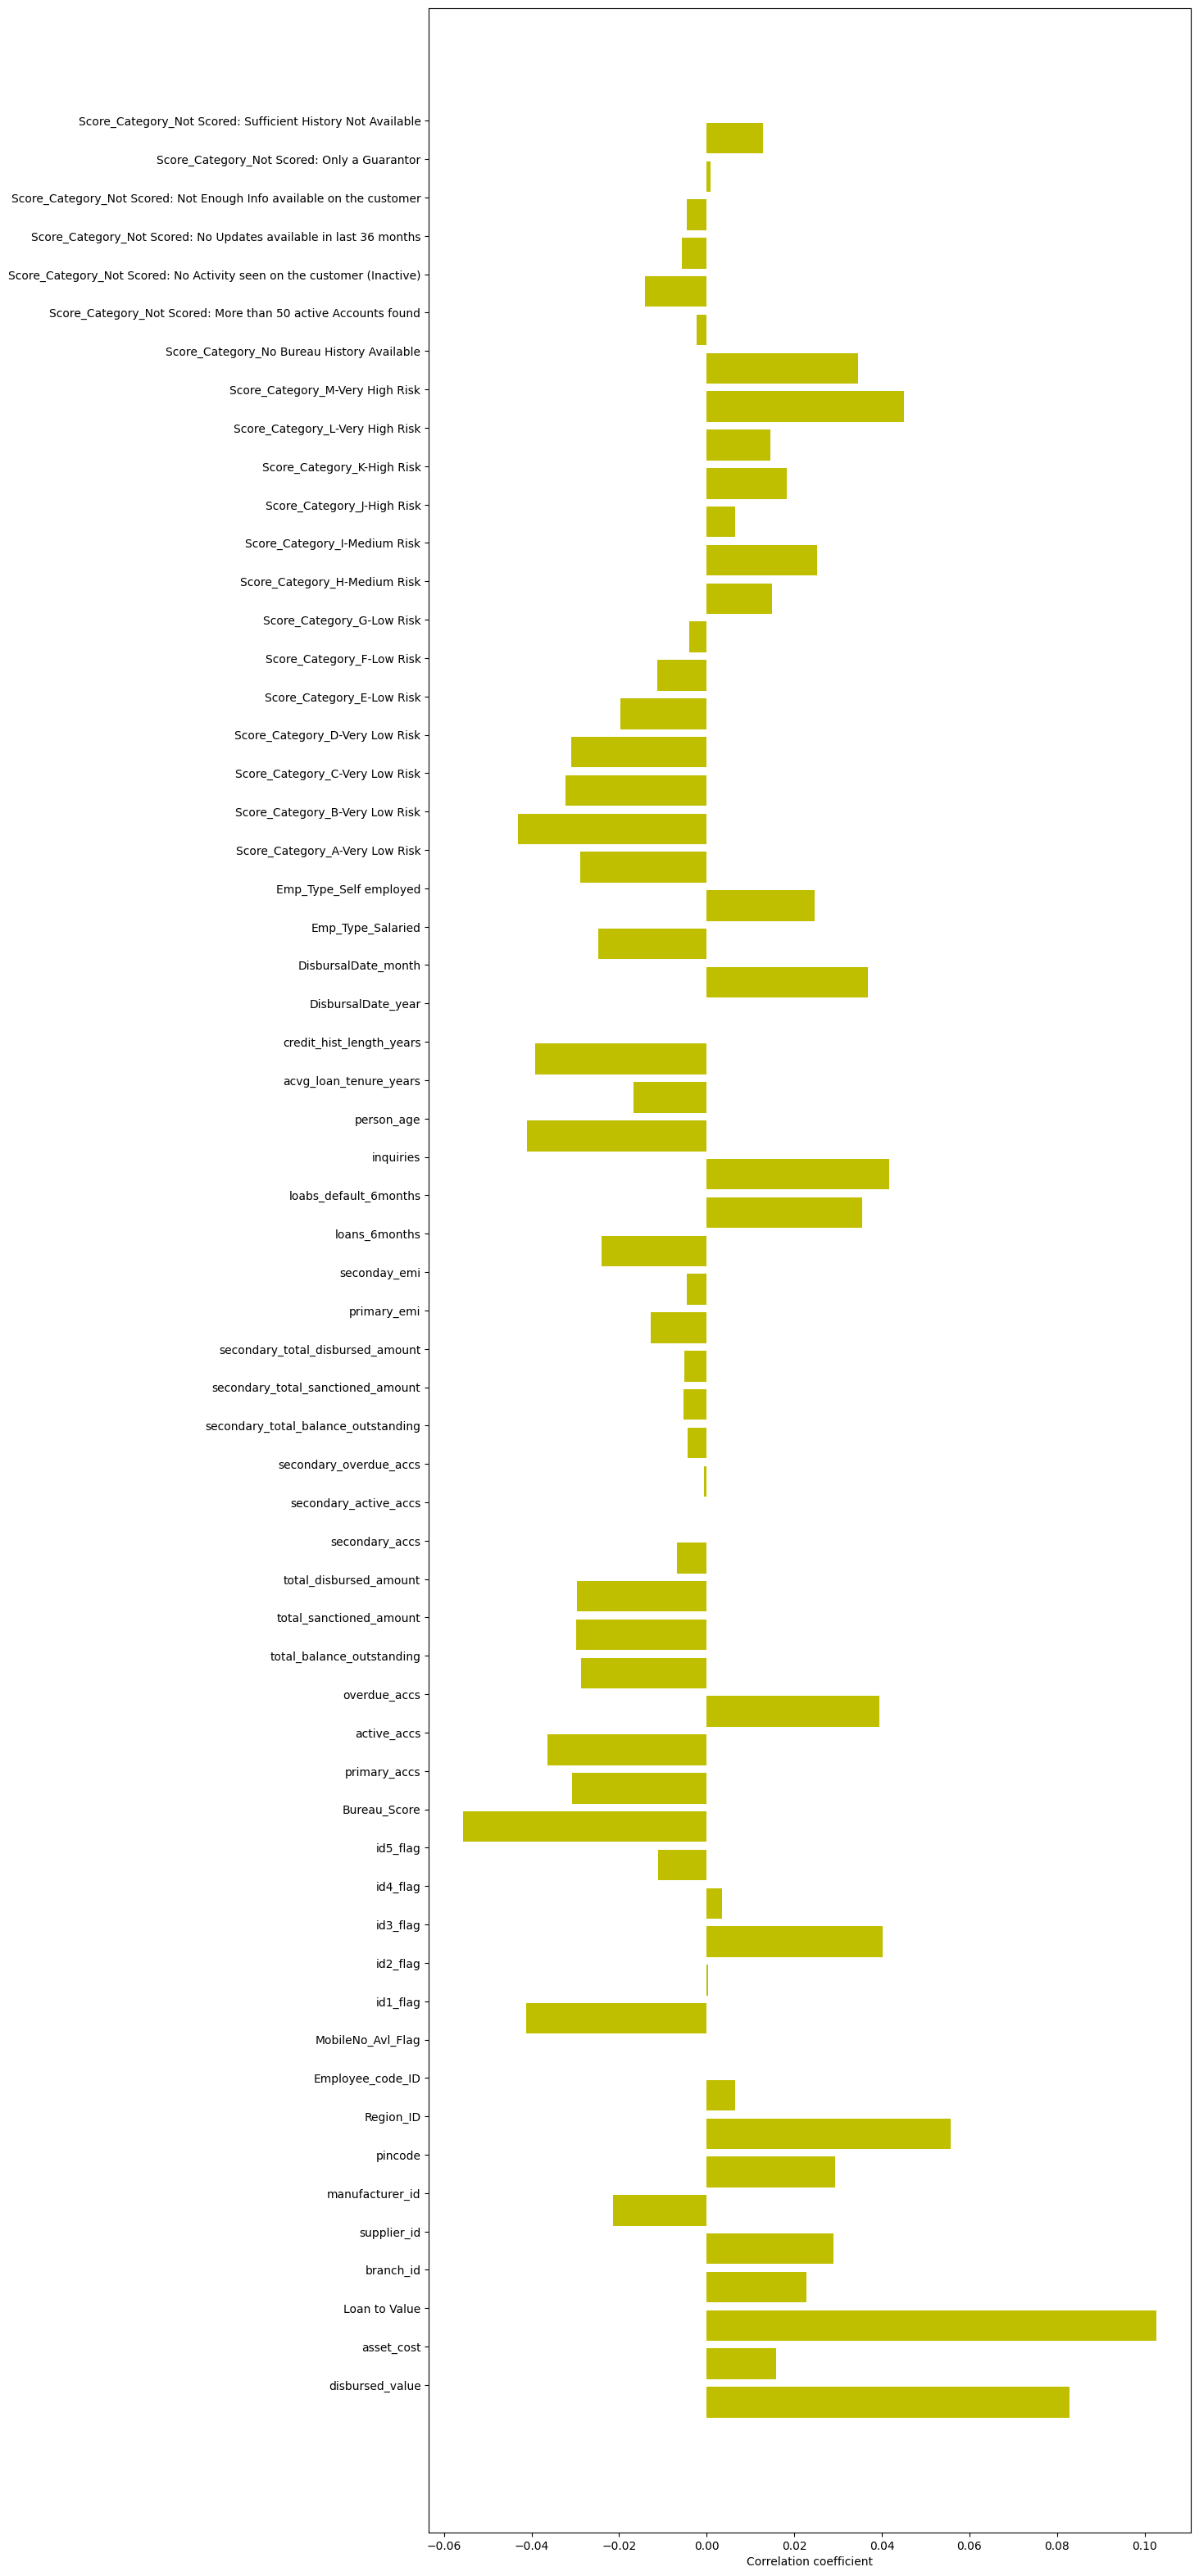

In [31]:
ID_COLS = ["ID"]
TARGET_COL = ["default"]
COLS_TO_DELETE = ["credit_hist_length", "credit_hist_length_months", "acvg_loan_tenure", "acvg_loan_tenure_months"]

x_cols = [col for col in dummy_df.columns if col not in list(set(TARGET_COL + ID_COLS +COLS_TO_DELETE))]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(dummy_df[col].values, dummy_df[TARGET_COL].values.flatten())[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")

plt.show()

In [32]:
## "Loan To Value",  "disbursed_value", "Score category medium high risk", "region id" shows positive correlation with the target
## "id1_flag", "Bureau_Score",

df[["Loan to Value", "default"]]

,Loan to Value,default
0,89.55,0
1,88.39,1
2,86.95,0
3,89.23,0
4,89.68,1
...,...,...
49995,85.00,0
49996,77.19,0
49997,85.00,1
49998,89.70,1


In [33]:
ALL_COLUMNS = list(set(dummy_df.columns) - set(TARGET_COL + ID_COLS +COLS_TO_DELETE))

### Challenges : random forest, xgboost etc doesn't work well with imbalanced dataset because each tree is built on random sample from data (with replacement) and is ends up with class imbalance

In [34]:
### Challenges : random forest, xgboost etc doesn't work well with imbalanced dataset because each tree is built on random sample from data (with replacement) and is ends up with class imbalance

In [35]:
ALL_COLUMNS

['Score_Category_Not Scored: Only a Guarantor',
 'Score_Category_Not Scored: More than 50 active Accounts found',
 'supplier_id',
 'manufacturer_id',
 'primary_emi',
 'Score_Category_F-Low Risk',
 'Score_Category_I-Medium Risk',
 'Score_Category_B-Very Low Risk',
 'id3_flag',
 'Score_Category_Not Scored: No Activity seen on the customer (Inactive)',
 'acvg_loan_tenure_years',
 'Score_Category_C-Very Low Risk',
 'Region_ID',
 'overdue_accs',
 'MobileNo_Avl_Flag',
 'Bureau_Score',
 'secondary_total_disbursed_amount',
 'Emp_Type_Salaried',
 'Score_Category_E-Low Risk',
 'Score_Category_Not Scored: No Updates available in last 36 months',
 'Score_Category_Not Scored: Sufficient History Not Available',
 'asset_cost',
 'Score_Category_A-Very Low Risk',
 'Score_Category_M-Very High Risk',
 'id5_flag',
 'primary_accs',
 'seconday_emi',
 'credit_hist_length_years',
 'Score_Category_G-Low Risk',
 'Score_Category_K-High Risk',
 'Score_Category_J-High Risk',
 'loans_6months',
 'secondary_active_ac

In [36]:
from imblearn.over_sampling import SMOTE
RANDOM_SEED = 5
smote = SMOTE(random_state=RANDOM_SEED, n_jobs=-1, sampling_strategy='auto')

In [37]:
X_resampled, y_resampled = smote.fit_resample(dummy_df[list(set(dummy_df.columns) - set(TARGET_COL + ID_COLS +COLS_TO_DELETE))], dummy_df[TARGET_COL])


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [38]:
X_resampled.shape, y_resampled.shape, dummy_df[TARGET_COL].shape

((76606, 60), (76606, 1), (48246, 1))

In [39]:
y_resampled.value_counts(), dummy_df[TARGET_COL].value_counts()

(default
 0          38303
 1          38303
 dtype: int64,
 default
 0          38303
 1           9943
 dtype: int64)

In [40]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(dummy_df[list(set(dummy_df.columns) - set(TARGET_COL + ID_COLS +COLS_TO_DELETE))], dummy_df[TARGET_COL], test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [41]:
y_train.value_counts()

default
1          25726
0          25600
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(50, 150, 20),
          "max_depth": [None, 3, 5, 10], #If None, then nodes are expanded until all leaves are pure
           "min_samples_split": np.arange(2, 20, 2), # The minimum number of samples required to split an internal node
           "min_samples_leaf": np.arange(1, 20, 2), # The minimum number of samples required to be at a leaf node
           "max_features": [0.2,0.5, 0.8, 1, "sqrt", "auto"], # The number of features to consider when looking for the best split:
           "max_samples": [20000]} #The sub-sample size

# Tuning our model with RandomizedSearchCV
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fitting our X_train and y_train
rs_rf.fit(X_train, y_train)

In [58]:
rs_rf.best_estimator_

RandomForestClassifier(max_features=0.5, max_samples=20000, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=130)

In [97]:
model = RandomForestClassifier(max_features=0.5, max_samples=20000, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=130)
model.fit(X_train, y_train)

<ipython-input-97-2bd9fc218d43>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_features=0.5, max_samples=20000, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=130)

In [98]:
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.029 seconds


In [99]:
from sklearn.metrics import classification_report

y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86     15791
           1       0.72      0.95      0.82      9489

    accuracy                           0.84     25280
   macro avg       0.84      0.86      0.84     25280
weighted avg       0.87      0.84      0.84     25280



In [100]:
feature_names = model.feature_names_in_
importances = model.feature_importances_
std = np.std(model.feature_importances_)

important_features_dict = dict(zip(feature_names, importances))


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: ['Emp_Type_Salaried', 'Emp_Type_Self employed', 'manufacturer_id', 'Loan to Value', 'disbursed_value']


In [101]:
!pip install xgboost

In [ ]:
# scale_pos_weight

[0.00186464 0.         0.00304885 0.04339294 0.00336153 0.02056039
 0.0130851  0.0096645  0.07851159 0.01149741 0.00312161 0.02323448
 0.00825656 0.00270591 0.         0.00820837 0.00230599 0.17906378
 0.00511344 0.00499135 0.00634227 0.00453882 0.03266345 0.02122163
 0.0176313  0.00271427 0.00160421 0.00322175 0.00654237 0.01217822
 0.00874402 0.0037104  0.00157818 0.02293362 0.00606807 0.00368077
 0.00800444 0.13145107 0.00293168 0.00265885 0.00262981 0.00351116
 0.00467188 0.00260734 0.0049548  0.06034084 0.03363661 0.0029348
 0.00278324 0.00173357 0.02162951 0.00190751 0.00158852 0.00615023
 0.01158338 0.02364573 0.00474599 0.08364077 0.         0.00289647]


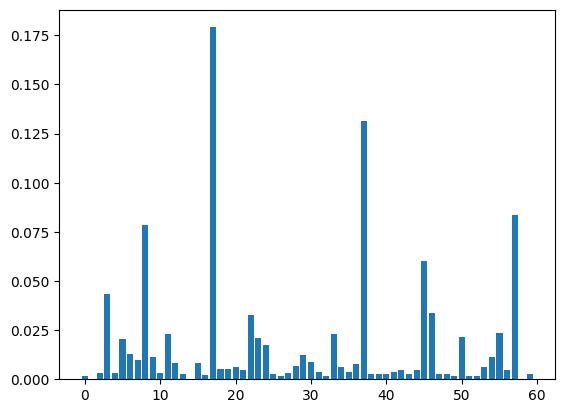

In [47]:
from xgboost import XGBClassifier
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_names_in_)), model.feature_importances_)
pyplot.show()

In [48]:
feature_names = model.feature_names_in_
importances = model.feature_importances_
std = np.std(model.feature_importances_)

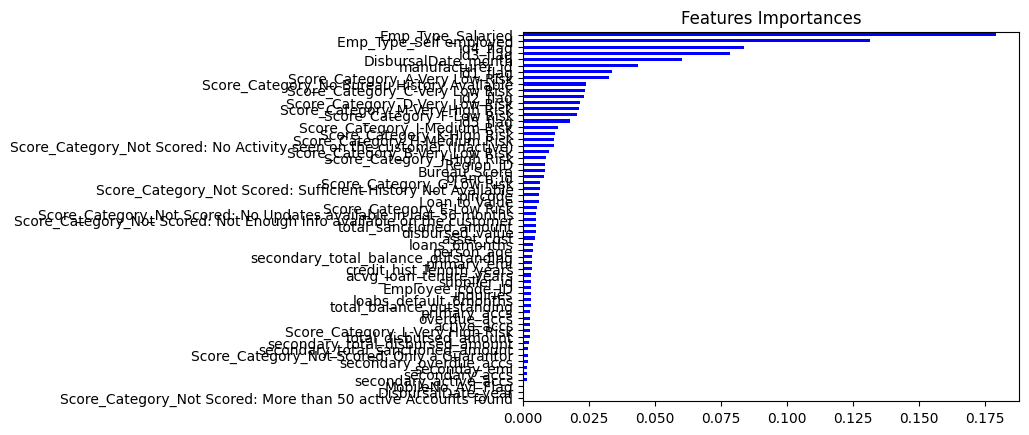

In [49]:
# Create a pd.Series of features importances
importances = pd.Series(data=importances,
                        index= feature_names)
# Sort importances
importances_sorted = importances.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

In [50]:
from sklearn.metrics import classification_report

y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     15374
           1       0.74      0.94      0.83      9906

    accuracy                           0.85     25280
   macro avg       0.85      0.87      0.85     25280
weighted avg       0.87      0.85      0.85     25280



In [51]:
feature_names = model.feature_names_in_
importances = model.feature_importances_
std = np.std(model.feature_importances_)

important_features_dict = dict(zip(feature_names, importances))


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: ['Emp_Type_Salaried', 'Emp_Type_Self employed', 'id4_flag', 'id3_flag', 'DisbursalDate_month']


### 5 most important features:

*  'Emp_Type_Salaried'
*  'Emp_Type_Self employed
*  'id4_flag'
*  'id3_flag'
*  'DisbursalDate_month'


In [52]:
corr=dummy_df.corr().abs()
high_corr_var=np.where(corr>0.9)
high_corr_var=[(corr.columns[x],corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('total_balance_outstanding', 'total_sanctioned_amount'),
 ('total_balance_outstanding', 'total_disbursed_amount'),
 ('total_sanctioned_amount', 'total_disbursed_amount'),
 ('secondary_total_balance_outstanding', 'secondary_total_sanctioned_amount'),
 ('secondary_total_balance_outstanding', 'secondary_total_disbursed_amount'),
 ('secondary_total_sanctioned_amount', 'secondary_total_disbursed_amount'),
 ('Emp_Type_Salaried', 'Emp_Type_Self employed')]

In [54]:
df[TARGET_COL].value_counts()

default
0          38303
1           9943
dtype: int64

In [56]:
# XGBClassifier hyperparameters
xgb_grid = params = {
                    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
                    "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
                    "min_child_weight" : [ 1, 3, 5, 7 ],
                    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],

                    }

# Tuning our model with XGBClassifier
xgb_rf = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=xgb_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fitting our X_train and y_train
xgb_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=True)

In [63]:
print(xgb_rf.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [88]:
model = XGBClassifier(learning_rate=0.1, max_depth=12, min_child_weight=1, gamma=0.0, colsample_bytree=0.4)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[0.00455043 0.         0.00370691 0.03795123 0.00465989 0.01871207
 0.01486681 0.0193528  0.05428486 0.00909084 0.00342479 0.02283246
 0.00677119 0.00425654 0.         0.00695016 0.00356584 0.05467506
 0.00754832 0.0097584  0.00840732 0.00413334 0.02398374 0.03715488
 0.01159454 0.00392806 0.00282793 0.00379683 0.00786043 0.01373971
 0.00807321 0.00472435 0.00406411 0.01203146 0.00489723 0.00390502
 0.01080172 0.27855426 0.00367514 0.00331315 0.00691809 0.0047978
 0.00462825 0.00355999 0.00847927 0.03254364 0.08820109 0.00378549
 0.00366778 0.00279565 0.02214995 0.0035778  0.00363923 0.00565594
 0.00882079 0.01828393 0.00436089 0.03262172 0.         0.00308763]


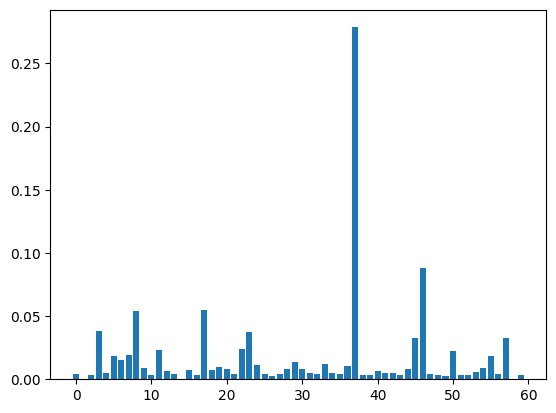

In [89]:
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_names_in_)), model.feature_importances_)
pyplot.show()

In [90]:
from sklearn.metrics import classification_report

y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     15314
           1       0.75      0.95      0.84      9966

    accuracy                           0.86     25280
   macro avg       0.86      0.87      0.85     25280
weighted avg       0.88      0.86      0.86     25280



In [91]:
feature_names = model.feature_names_in_
importances = model.feature_importances_
std = np.std(model.feature_importances_)

important_features_dict = dict(zip(feature_names, importances))


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: ['Emp_Type_Self employed', 'id1_flag', 'Emp_Type_Salaried', 'id3_flag', 'manufacturer_id']


In [77]:
# XGBClassifier hyperparameters
xgb_grid = params = {
                    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
                    "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
                    "min_child_weight" : [ 1, 3, 5, 7 ],
                    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
                    "scale_pos_weight" : [0.7]
                    }

# Tuning our model with XGBClassifier
xgb_rf = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=xgb_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fitting our X_train and y_train
xgb_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'scale_pos_weight': [0.7]},
                   verbose=True)

In [79]:
print(xgb_rf.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [92]:
model = XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=3, gamma=0.4, colsample_bytree=0.4)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
feature_names = model.feature_names_in_
importances = model.feature_importances_
std = np.std(model.feature_importances_)

important_features_dict = dict(zip(feature_names, importances))


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: ['Emp_Type_Self employed', 'id1_flag', 'Emp_Type_Salaried', 'id3_flag', 'Score_Category_M-Very High Risk']


In [95]:
from sklearn.metrics import classification_report

y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     15169
           1       0.76      0.95      0.84     10111

    accuracy                           0.86     25280
   macro avg       0.86      0.87      0.86     25280
weighted avg       0.88      0.86      0.86     25280



In [96]:
feature_names = model.feature_names_in_
importances = model.feature_importances_
std = np.std(model.feature_importances_)

important_features_dict = dict(zip(feature_names, importances))


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: ['Emp_Type_Self employed', 'id1_flag', 'Emp_Type_Salaried', 'id3_flag', 'Score_Category_M-Very High Risk']


TOP Features:
['Emp_Type_Salaried', 'Emp_Type_Self employed', 'manufacturer_id', 'Loan to Value', 'disbursed_value']